# Import Libraries

In [ ]:
# Here we import the libraries we will use
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

# I have used itables, because they look really nice
#!pip install itables
#from itables import init_notebook_mode, show
#from google.colab import data_table
#init_notebook_mode(all_interactive=True)

In [ ]:
!pip install sdv;

In [ ]:
import pandas as pd
import numpy as np
import requests
url = 'https://raw.githubusercontent.com/Evanslearn/Python-General/main/dataset%20-%20Time%20Series%20Prediction%20Tutorial%20with%20EDA.txt'
url = 'https://raw.githubusercontent.com/Evanslearn/Python-General/main/trends.csv'
url = 'https://raw.githubusercontent.com/Evanslearn/Python-General/main/Health%20Insurance%20Lead%20Prediction%20Raw%20Data.csv'

response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the content of the response to a local CSV file
    with open("downloaded_data.csv", "wb") as f:
        f.write(response.content)
    print("CSV file downloaded successfully")
else:
    print("Failed to download CSV file. Status code:", response.status_code)

response = requests.get(url)
df_dataset = pd.read_csv("downloaded_data.csv")

df_dataset

CSV file downloaded successfully


,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1


In [ ]:
df_dataset = df_dataset.drop('ID', axis=1)

In [ ]:
# Also, we need to create the categorical columns to one-hot columns

# Define function that, given df, converts a column to one-hot
def encode_and_bind(df, colname):
  colname  = colname;

  dummies = pd.get_dummies(df[colname], dtype='int' ) # Convert categorical into dummy/indicator variables
  res = pd.concat([df, dummies], axis=1) # temporary dataframe, by concatenating initial dataframe and dummy variables
  df = res.drop(columns=[colname]) # Drop the column colname. We have effectively replaced the column with dummy/indicator variables (one column for each categorical value)
  return df

cat_feats = ['City_Code', 'Holding_Policy_Duration', 'Accomodation_Type', 'Reco_Insurance_Type' , 'Is_Spouse', 'Health Indicator']

for cat_feat in cat_feats:
  # for each categorical feature, call our function to replace the column with one-hot representation
  df_dataset = encode_and_bind(df_dataset, cat_feat)

In [ ]:
def testfunc():
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['date']
    ys = series['value']

    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
  df_sorted = df_dataset.sort_values('date', ascending=True)
  _plot_series(df_sorted, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel('date')
  _ = plt.ylabel('value')

In [ ]:
# Split data into training and testing sets
df_train, df_test = train_test_split(df_dataset, test_size=0.3, random_state=0)
initialData = df_train
numberOfSyntheticRows = int( len(initialData) )

In [ ]:
metadata_manual = {
    "columns": {
        "location": {
            "sdtype": "categorical"
        },
        "year": {
            "sdtype": "numerical"
        },
        "category": {
            "sdtype": "categorical"
        },
        "rank": {
            "sdtype": "categorical"
        },
        "query": {
            "sdtype": "categorical"
        }
    },
    "METADATA_SPEC_VERSION": "SINGLE_TABLE_V1"
}

#metadata.load_from_dict(metadata_manual)

In [ ]:
# Health Insurance and Lead Prediction
true = 'true'
metadata_manual = {
    "columns": {
        "ID": {
            "sdtype": "id"
        },
        "City_Code": {
            "sdtype": "categorical",
            "pii": true
        },
        "Region_Code": {
            "sdtype": "numerical"
        },
        "Accomodation_Type": {
            "sdtype": "categorical"
        },
        "Reco_Insurance_Type": {
            "sdtype": "categorical"
        },
        "Upper_Age": {
            "sdtype": "numerical"
        },
        "Lower_Age": {
            "sdtype": "numerical"
        },
        "Is_Spouse": {
            "sdtype": "categorical"
        },
        "Health Indicator": {
            "sdtype": "categorical"
        },
        "Holding_Policy_Duration": {
            "sdtype": "categorical"
        },
        "Holding_Policy_Type": {
            "sdtype": "categorical"
        },
        "Reco_Policy_Cat": {
            "sdtype": "numerical"
        },
        "Reco_Policy_Premium": {
            "sdtype": "numerical"
        },
        "Response": {
            "sdtype": "categorical"
        }
    },
    "METADATA_SPEC_VERSION": "SINGLE_TABLE_V1",
    "primary_key": "ID"
}

#metadata.load_from_dict(metadata_manual)

## Use the creditcard data

In [ ]:
def useCreditCardData(useFraudData, numberOfSyntheticRows):
  useCreditCard = "useCreditCard"
  df_dataset = pd.read_csv("creditcard.csv")


  # Split data into training and testing sets
  df_train, df_test = train_test_split(df_dataset, test_size=0.3, random_state=0)

  df_train_fraud = df_train[df_train['Class'] == 1]
  if useFraudData == "useFraud":
    initialData = df_train_fraud # I define this helper variable, which is basically the loaded dataset
  if useFraudData != "useFraud":
    initialData = df_train

  if numberOfSyntheticRows == "rowsLikeDataUsedToFit":
    numberOfSyntheticRows = int( len(initialData))
  elif numberOfSyntheticRows == "rowsLikeTrainSet":
    numberOfSyntheticRows = int( len(df_train))
  else:
    numberOfSyntheticRows = int( numberOfSyntheticRows )

  return initialData, df_train, df_test, useCreditCard

In [ ]:
# FOR THIS TO WORK, creditcard.csv MUST HAVE BEEN UPLOADED. IT WAS TOO LARGE TO UPLOAD IN GITHUB

"""Change number of Synthetic Rows to:
- Some Integer
- rowsLikeDataUsedToFit, for using the length of the dataframe that will be used in the synthesizer
- rowsLikeTrainSet, for using the length of the original data train set (70% of dataset length)"""
useCreditCard = "NO"
#[initialData, df_train, df_test, useCreditCard] = useCreditCardData(useFraudData = "useFraud", numberOfSyntheticRows = "rowsLikeTrainSet")

In [ ]:
saveTestSet = "SaveTest"
saveTrainSet = "SaveTrain"
if saveTestSet == "SaveTest":
    # Specify the filename
    filename = "test_set.csv"
    df_test.to_csv(filename, index=False)

if saveTrainSet == "SaveTrain":
  # Specify the filename
  filename = "train_set.csv"
  df_train.to_csv(filename, index=False)

In [ ]:
# First, we create the metadata object
from sdv.metadata import SingleTableMetadata
from sdv.single_table import GaussianCopulaSynthesizer, CTGANSynthesizer, CopulaGANSynthesizer, TVAESynthesizer

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(initialData)

In [ ]:
# DEFINE SYNTHESIZER
synthesizer = "GaussianCopula"



# Step 1: Create the synthesizer
if synthesizer == "GaussianCopula":
  synthesizer = GaussianCopulaSynthesizer(metadata)
elif synthesizer == "CTGAN":
  synthesizer = CTGANSynthesizer(metadata)
elif synthesizer == "CopulaGAN":
  synthesizer = CopulaGANSynthesizer(metadata)
elif synthesizer == "TVAE":
  synthesizer = TVAESynthesizer(metadata)

# Step 2: Train the synthesizer
synthesizer.fit(initialData)

# Step 3: Generate synthetic data
synthetic_data = synthesizer.sample(num_rows=numberOfSyntheticRows)

# Evaluate data
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    initialData,
    synthetic_data,
    metadata)

# Plot
from sdv.evaluation.single_table import get_column_plot

def plot_Column(column_name):

  fig = get_column_plot(
      real_data=initialData,
      synthetic_data=synthetic_data,
      column_name=column_name,
      metadata=metadata
  )

  fig.show()

/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:84: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 73/73 [00:01<00:00, 58.66it/s]|
Column Shapes Score: 99.52%

(2/2) Evaluating Column Pair Trends: |██████████| 2628/2628 [03:55<00:00, 11.16it/s]|
Column Pair Trends Score: 86.74%

Overall Score (Average): 93.13%



In [ ]:
def printAllSynthetic1PerRow():
  cols = initialData.columns
  print(cols)

  for col in cols:
      plot_Column(col)
#printAllSynthetic1PerRow()

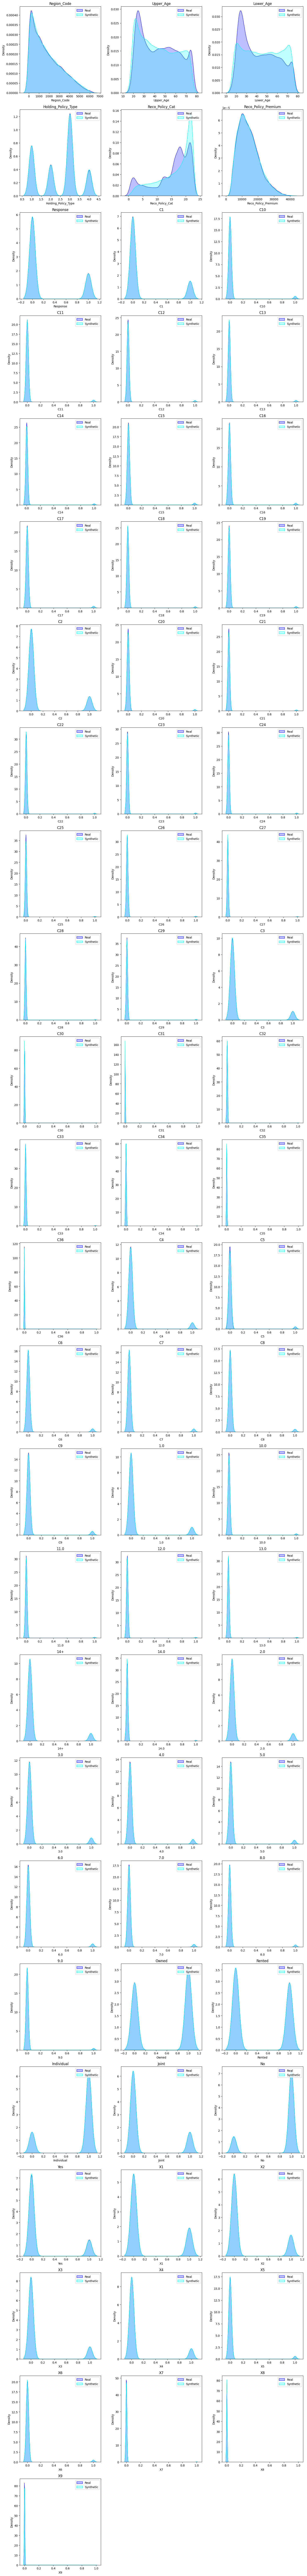

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming get_column_plot plots the column data and returns a Matplotlib figure
# We extract the necessary plotting logic here.
def plot_Column(ax, column_name, plot_with_seaborn):

  # Extract plot data (Example logic, modify as per actual logic in get_column_plot)
  real_column_data = initialData[column_name]
  synthetic_column_data = synthetic_data[column_name]

  if plot_with_seaborn != 'YES':
    # Plot real data with higher transparency and edge color
    ax.hist(real_column_data, bins=30, alpha=0.7, label='Real Data', edgecolor='black', color='blue')

    # Plot synthetic data with lower transparency and different color
    ax.hist(synthetic_column_data, bins=30, alpha=0.4, label='Synthetic Data', edgecolor='black', color='orange')

  if plot_with_seaborn == 'YES':
    # Plot KDE for real data
    sns.kdeplot(real_column_data, ax=ax, label='Real', color='blue', fill=True)

    # Plot KDE for synthetic data
    sns.kdeplot(synthetic_column_data, ax=ax, label='Synthetic', color='cyan', fill=True)

  # Set the title and labels
  ax.set_title(column_name)
  ax.legend()

# Columns to plot
cols = initialData.columns
num_cols = len(cols)

# Define the grid size for subplots
num_cols_per_row = 3
num_rows = (num_cols // num_cols_per_row) + (num_cols % num_cols_per_row > 0)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(15, 5 * num_rows))

# Flatten axes array for easy iteration
axes = axes.flatten()



# Plot each column in its respective subplot
for ax, col in zip(axes, cols):
    plot_Column(ax, col, plot_with_seaborn = "YES")

# Hide any extra subplots
for i in range(len(cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [ ]:
saveSyntheticData = "SaveSyntheticData"
if saveSyntheticData == "SaveSyntheticData":
  # Specify the filename
  filename = "synthetic_train_set.csv"

  synthetic_data.to_csv(filename, index=False)

In [ ]:
# create a combined df, with both the train set and the synthetic data - USEFUL TO REMEDY CLASS IMBALANCE

combined_df = pd.concat([df_train, synthetic_data], ignore_index=True)
#print(combined_df.shape)

# Specify the filename
filename = "combined_df.csv"

combined_df.to_csv(filename, index=False)

In [ ]:
# Specify the filename
filename = "metadata.json"

# Save metadata to JSON file
try:
  metadata.save_to_json(filepath='my_metadata_v1.json')
except:
  pass

metadata = SingleTableMetadata.load_from_json(
    filepath='my_metadata_v1.json')

In [ ]:
synthetic_data

,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,C1,C10,C11,...,Yes,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,2243,26,43,NaN,22,10412.2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,4733,51,54,3.0,13,15274.1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4426,20,29,3.0,19,4762.7,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1049,28,32,3.0,19,11692.9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2031,24,22,NaN,14,7566.4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35612,1397,73,73,3.0,19,31473.2,1,0,0,0,...,1,0,1,0,0,0,0,0,0,0
35613,4634,27,43,2.0,17,13692.3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35614,4088,19,36,NaN,22,3536.1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
35615,4495,29,24,4.0,10,13796.9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#ML Models


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
datasetToUse = "Combined"

if datasetToUse == "Synthetic":
  df_dataset = synthetic_data
if datasetToUse == "InitialTrain":
  df_dataset = initialData
if datasetToUse == "Combined":
  df_dataset = combined_df

In [ ]:
df = df_dataset
df = df.dropna()
df = df.reset_index(drop=True)

df_test = df_test.dropna()
df_test = df_test.reset_index(drop=True)

In [ ]:
# Features and labels
#df = df_dataset.drop('ID', axis=1)

if useCreditCard == "useCreditCard":
  targetName = "Class"
else:
  targetName = "Response"

X_train = df.drop(targetName, axis=1)
y_train = df[targetName]

X_test = df_test.drop(targetName, axis=1)
y_test = df_test[targetName]

In [ ]:
# Split data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Designate training data

In [ ]:
def trainTest():
  if useCreditCard == "useCreditCard":
    targetName = "Class"
  else:
    targetName = "Response"

    if datasetToUse == 'InitialTrain':
      X_train = df_train.drop(targetName, axis=1)
      y_train = df_train[targetName]
    if datasetToUse == 'Synthetic':
      X_train = synthetic_data.drop(targetName, axis=1)
      y_train = synthetic_data[targetName]
    if datasetToUse == 'Combined':
      X_train = combined_df.drop(targetName, axis=1)
      y_train = combined_df[targetName]

    X_test = df_test.drop(targetName, axis=1)
    y_test = df_test[targetName]

## Random Forest

In [ ]:
def rfGridSearch():
  from sklearn.ensemble import RandomForestClassifier

  #Random Forest Classifier
  RF_param_grid = {
      'n_estimators': [50, 100, 200],
      'max_depth': [None, 10, 20],
      'min_samples_split': [2, 5, 10],
      'min_samples_leaf': [1, 2, 4]
  }

  # Initialize the Random Forest classifier
  rf_classifier = RandomForestClassifier(random_state=42)

  # Create a grid search object
  grid_search = GridSearchCV(rf_classifier, RF_param_grid, cv=5, scoring='accuracy')

  # Perform grid search on the training data
  grid_search.fit(X_train, y_train)

  # Get the best parameters from the grid search
  best_params = grid_search.best_params_
  print(f"Best Parameters: {best_params}")

  # Make predictions on the test set using the best model
  best_rf_classifier = grid_search.best_estimator_
  y_pred = best_rf_classifier.predict(X_test)

  # Evaluate the performance
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy: {accuracy}")

  classification_rep = classification_report(y_test, y_pred)
  print('Classification Report:\n', classification_rep)

## RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier


# Create and train the KNN classifier
rf_classifier = RandomForestClassifier(random_state=0)

rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

classification_rep = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_rep)

Accuracy: 0.7526253112482407
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86      6965
           1       0.35      0.01      0.01      2272

    accuracy                           0.75      9237
   macro avg       0.55      0.50      0.44      9237
weighted avg       0.65      0.75      0.65      9237



# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


# Create and train the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5) #n_neighbors=int(np.sqrt(len(combined_df)))
knn_classifier.fit(X_train, y_train)

# Make predictions
y_pred = knn_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

classification_rep = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_rep)

Accuracy: 0.7044494965898019
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.91      0.82      6965
           1       0.23      0.08      0.12      2272

    accuracy                           0.70      9237
   macro avg       0.49      0.50      0.47      9237
weighted avg       0.62      0.70      0.65      9237



## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(random_state=0, max_iter=1000)
lr_classifier.fit(X_train, y_train)

# Make predictions
y_pred = lr_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

classification_rep = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_rep)

Accuracy: 0.7540326945978132
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86      6965
           1       0.00      0.00      0.00      2272

    accuracy                           0.75      9237
   macro avg       0.38      0.50      0.43      9237
weighted avg       0.57      0.75      0.65      9237



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# This is a demo example code
def demoSDV():
  from sdv.datasets.demo import download_demo

  real_data, metadata = download_demo(
      modality='single_table',
      dataset_name='fake_hotel_guests')

  from sdv.lite import SingleTablePreset

  synthesizer = SingleTablePreset(metadata, name='FAST_ML')
  synthesizer.fit(data=real_data)

  synthetic_data = synthesizer.sample(num_rows=500)

  from sdv.evaluation.single_table import evaluate_quality

  quality_report = evaluate_quality(
      real_data,
      synthetic_data,
      metadata)

  from sdv.evaluation.single_table import get_column_plot

  fig = get_column_plot(
      real_data=real_data,
      synthetic_data=synthetic_data,
      column_name='amenities_fee',
      metadata=metadata
  )

  fig.show()

#demoSDV()